Find average ITI time

In [4]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *


In [6]:
file_path = r"C:\Users\alber\Downloads\iti.csv"
# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Unnamed: 0,pp4,pp3,pp2,pp1,nn4,nn3,nn2,nn1,nn8,nn7,nn6,nn5,pp8,pp7,pp6,pp5
0,Start baseline,03:00.4,03:00.5,03:00.4,03:01.9,03:01.7,03:01.3,03:01.4,02:46.6,03:01.0,03:01.3,03:00.3,03:00.6,03:01.5,03:00.9,03:01.6,02:49.6
1,ITI,00:03.6,00:03.6,00:03.5,00:03.3,00:05.0,00:03.8,00:02.9,00:05.9,00:05.0,00:03.9,00:03.4,00:04.1,00:04.8,00:04.3,00:06.0,00:03.0
2,Start 1 intro,02:00.4,02:00.2,02:00.5,02:01.3,02:01.0,02:01.9,02:00.6,02:00.7,02:01.5,02:00.1,02:00.1,02:00.7,02:01.3,02:01.0,2:01,02:00.0
3,ITI,00:09.0,00:04.8,00:04.4,00:07.5,00:08.8,00:07.4,00:10.7,00:06.8,00:08.4,0:30,00:05.6,00:05.0,00:14.2,00:20.5,00:07.3,00:04.2
4,Start Break 1,01:01.0,01:00.4,01:00.1,01:01.1,01:02.6,01:11.2,01:00.8,01:01.1,01:01.0,01:00.8,01:00.5,01:03.8,01:01.2,01:00.0,1:24,01:00.1


In [8]:
import pandas as pd

# 1) Load your CSV (adjust path as needed)
# df = pd.read_csv("all_bout_times.csv")

# 2) Grab only the ITI rows
iti = df[df['Unnamed: 0'] == 'ITI'].copy().reset_index(drop=True)

# 3) Label each ITI alternatingly as Entry vs Removal
iti['Type'] = ['Entry' if i % 2 == 0 else 'Removal' 
               for i in range(len(iti))]

# 4) Drop the label‐column and convert each time string to seconds
times = iti.drop(columns=['Unnamed: 0', 'Type'])

def to_seconds(ts):
    mins, secs = ts.split(':')
    return int(mins) * 60 + float(secs)

times_sec = times.applymap(to_seconds)

# 5) Split back into Entry vs Removal
entry_times  = times_sec[iti['Type']=='Entry']
removal_times = times_sec[iti['Type']=='Removal']

# 6a) Per‐subject averages
entry_per_subject  = entry_times.mean()
removal_per_subject = removal_times.mean()

per_subject_df = pd.DataFrame({
    'Entry_mean_s':  entry_per_subject,
    'Removal_mean_s': removal_per_subject
})
print("Per‐subject mean ITI durations (s):")
print(per_subject_df)

# 6b) Overall group‐level averages
overall_entry   = entry_times.values.mean()
overall_removal = removal_times.values.mean()

print(f"\nGroup‐level mean Entry ITI:   {overall_entry:.2f} s")
print(f"Group‐level mean Removal ITI: {overall_removal:.2f} s")


Per‐subject mean ITI durations (s):
     Entry_mean_s  Removal_mean_s
pp4      2.866667        7.533333
pp3      2.833333        4.583333
pp2      3.500000        5.750000
pp1      3.500000        7.783333
nn4      4.133333       12.216667
nn3      3.633333        8.283333
nn2      4.133333        8.716667
nn1      4.216667        8.250000
nn8      4.033333        9.533333
nn7      3.600000       13.666667
nn6      2.950000        5.200000
nn5      3.383333        5.100000
pp8      4.166667        9.033333
pp7      3.933333       10.066667
pp6      4.066667        8.083333
pp5      2.666667        5.933333

Group‐level mean Entry ITI:   3.60 s
Group‐level mean Removal ITI: 8.11 s


C:\Users\alber\AppData\Local\Temp\ipykernel_12452\2643990697.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  times_sec = times.applymap(to_seconds)


# Hab Dishab Sanbox Analysis

Answering random questions

In [ ]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *


In [ ]:
# NAc: #15616F
# mPFC: #FFAF00

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\nac_csvs"
# brain_region = '#15616F'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc_csvs"
brain_region = '#FFAF00'


save_images = False

In [ ]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]

In [ ]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p5-240821-092649\Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\p6-240821-103616\Notes.txt
read from t=0s to t=1322.66s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Hab_Dishab\All\mpfc\

### Check if there is a second behavioral event when you take the peak nearest to first investigation. We want to ensure you are not taking the peak of a second behavioral event.

In [ ]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=4, # total_avg_bout_duration 
                                  mode='standard')

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...
Computing DA metrics for p1-240516-064158 ...
Computing DA metrics for p2-240516-071921 ...
Computing DA metrics for p3-240516-075659 ...
Computing DA metrics for p5-240821-092649 ...
Computing DA metrics for p6-240821-103616 ...
Computing DA metrics for p7-240821-111323 ...
Computing DA metrics for p8-240821-121933

In [ ]:
exp_da_dict = get_trial_dataframes(experiment)
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']

In [ ]:
def count_peaks_past_next_investigation(exp_da_dict, behavior="Investigation"):
    """
    For each subject and bout, check if the first behavior's peak occurs
    after the second behavior's onset. Returns a nested dict:
    
    {
      subject_id: {
        bout_label: {
          "overlap": True/False,
          "absolute_peak_time": float,
          "second_onset": float
        },
        ...
      },
      ...
    }
    """
    from collections import defaultdict

    overlaps = defaultdict(dict)

    for subj, df in exp_da_dict.items():
        df_b = df[df["Behavior"] == behavior].copy()
        df_b.sort_values("Event_Start", inplace=True)

        for bout, g in df_b.groupby("Bout"):
            g = g.reset_index(drop=True)

            if len(g) < 2:
                overlaps[subj][bout] = {
                    "overlap": False,
                    "absolute_peak_time": None,
                    "second_onset": None
                }
                continue

            first = g.loc[0]
            second_onset = g.loc[1, "Event_Start"]
            absolute_peak_time = first["Event_Start"] + first["Time of Max Peak"]

            overlaps[subj][bout] = {
                "overlap": absolute_peak_time > second_onset,
                "absolute_peak_time": absolute_peak_time,
                "second_onset": second_onset
            }

    return overlaps


In [ ]:
overlaps = count_peaks_past_next_investigation(exp_da_dict)

In [ ]:
for subj, bouts in overlaps.items():
    for bout, info in bouts.items():
        if info["overlap"]:
            print(f"⚠️ {subj} / {bout}: 1st peak ({info['absolute_peak_time']:.2f}s) ≥ 2nd onset ({info['second_onset']:.2f}s)")


In [ ]:
# exp_da_dict['nn6']

### Quantify frequency of dopamine peaks throughout time, since the mPFC DA preprint shows that frequency was higher for novel contexts. 

In [ ]:
bout_defs = [
    {'prefix':'s1', 'introduced':'s1_Introduced', 'removed':'s1_Removed'},
    {'prefix':'s2', 'introduced':'s2_Introduced', 'removed':'s2_Removed'},
]

bout_bounds_df = experiment.get_bout_boundaries_df(bout_defs)
print(bout_bounds_df.head())


  Subject  Bout  Bout_Start_s  Bout_End_s
0      p1  s1-1       186.267     309.533
1      p1  s1-2       380.667     503.200
2      p1  s1-3       574.000     696.133
3      p1  s1-4       767.400     889.733
4      p1  s1-5       963.133    1085.867


In [ ]:
# 1) Get bout definitions and boundaries
bout_defs = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'},
]
bout_bounds_df = experiment.get_bout_boundaries_df(bout_defs)

# 2) Plot traces with both behavior spans and bout markers
# experiment.plot_behavior_and_bouts(bout_bounds_df, behavior_name="Investigation")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def detect_spontaneous_events(
    timestamps: np.ndarray,
    signal: np.ndarray,
    threshold_factor: float = 3.0,
    min_distance_s: float = 1.0,
    min_width_s:    float = 0.5
):
    """
    Detect peaks using a MAD‐threshold, plus a minimum inter‐peak interval
    and a minimum peak width.
    Returns:
      peak_times (np.ndarray),
      peak_amps (np.ndarray),
      peak_widths (np.ndarray, in seconds)
    """
    # 1) compute baseline + MAD
    med = np.median(signal)
    mad = np.median(np.abs(signal - med))
    thresh = med + threshold_factor * mad

    # 2) convert time criteria into sample counts (assumes uniform dt)
    dt = np.median(np.diff(timestamps))
    min_dist_samples  = int(np.round(min_distance_s / dt))
    min_width_samples = int(np.round(min_width_s    / dt))

    # 3) detect peaks
    peaks, props = find_peaks(
        signal,
        height=thresh,
        distance=min_dist_samples,
        width=min_width_samples
    )

    # 4) collect outputs
    peak_times  = timestamps[peaks]
    peak_amps   = signal[peaks]
    peak_widths = props["widths"] * dt

    return peak_times, peak_amps, peak_widths

def build_event_dataframe(
    experiment,
    threshold_factor: float = 3.0,
    min_distance_s:    float = 1.0,
    min_width_s:       float = 0.5
) -> pd.DataFrame:
    """
    Loop through experiment.trials, run detect_spontaneous_events on each trial,
    and return a DataFrame with columns:
      Subject | Trial | Event_Time | Amplitude | Width_s
    """
    rows = []
    for trial_name, trial in experiment.trials.items():
        ts  = np.array(trial.timestamps)
        sig = np.array(trial.zscore)   # or trial.dff if you prefer raw ΔF/F

        peak_times, peak_amps, peak_widths = detect_spontaneous_events(
            ts, sig,
            threshold_factor=threshold_factor,
            min_distance_s=min_distance_s,
            min_width_s=min_width_s
        )

        for t, a, w in zip(peak_times, peak_amps, peak_widths):
            rows.append({
                "Subject":    trial.subject_name,
                "Trial":      trial_name,
                "Event_Time": t,
                "Amplitude":  a,
                "Width_s":    w
            })

    return pd.DataFrame(rows)


def plot_all_traces_with_bouts_and_peaks(
    experiment,
    bout_bounds_df: pd.DataFrame,
    peaks_df: pd.DataFrame = None,
    behavior_name: str = "all",
    start_time: float = 30.0
):
    """
    Plots each trial's z-score with:
    - behavior spans (green for Investigation, gray for others),
    - lightly shaded blue spans for each bout,
    - optional red dots for spontaneous events (peaks_df).

    Parameters:
    - experiment: Experiment instance containing trials
    - bout_bounds_df: DataFrame with Subject, Bout_Start_s, and Bout_End_s
    - peaks_df: Optional DataFrame with Trial and Event_Time (and Amplitude)
    - behavior_name: Name of the behavior to span ("all" for all)
    - start_time: Minimum x-axis time for plotting
    """
    num_trials = len(experiment.trials)
    fig, axes = plt.subplots(nrows=num_trials,
                             figsize=(12, 3 * num_trials),
                             sharex=False)
    if num_trials == 1:
        axes = [axes]

    for ax, (trial_name, trial) in zip(axes, experiment.trials.items()):
        ax.set_title(trial_name)

        # 1. Plot z-score
        ax.plot(trial.timestamps, trial.zscore, color="black", lw=1, label="z-score")

        # 2. Behavior spans
        dfb = trial.behaviors
        if dfb is not None and not dfb.empty:
            if behavior_name != "all":
                dfb = dfb[dfb["Behavior"] == behavior_name]
            for _, row in dfb.iterrows():
                color = "green" if row["Behavior"] == "Investigation" else "gray"
                ax.axvspan(row["Event_Start"], row["Event_End"], color=color, alpha=0.3)

        # 3. Lightly shaded bouts in blue
        bounds = bout_bounds_df[bout_bounds_df["Subject"] == trial.subject_name]
        for _, row in bounds.iterrows():
            ax.axvspan(row["Bout_Start_s"], row["Bout_End_s"], color="skyblue", alpha=0.3)

        # 4. Peak events
        if peaks_df is not None:
            ev = peaks_df[peaks_df["Trial"] == trial_name]
            ax.scatter(ev["Event_Time"],
                       ev["Amplitude"],
                       color="red",
                       s=30,
                       zorder=5,
                       label="Peaks")

        # 5. Final formatting
        ax.set_xlim(start_time, trial.timestamps[-1])
        ax.tick_params(axis='x', labelbottom=True)
        ax.legend(loc='upper right', fontsize='small')

    plt.tight_layout()
    plt.show()


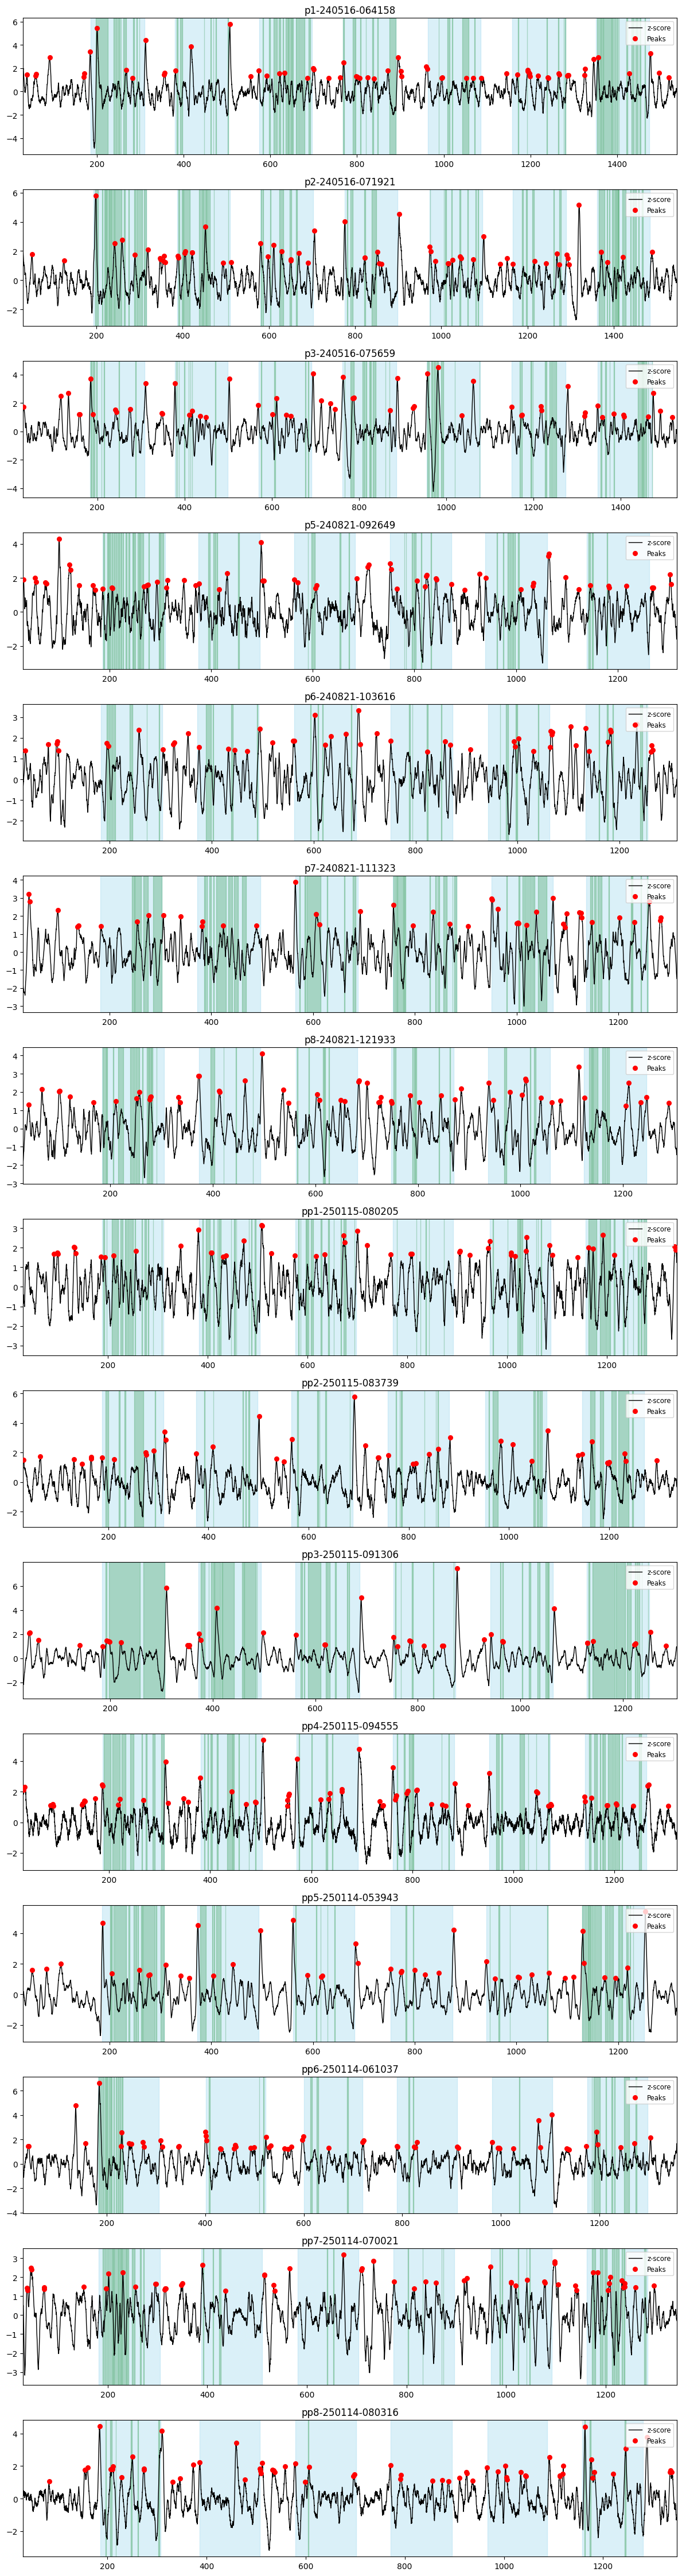

In [ ]:
bout_defs = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]

bout_bounds_df = experiment.get_bout_boundaries_df(bout_defs)
peaks_df = build_event_dataframe(experiment,   
                                threshold_factor=2,   # e.g. 2.5 × MAD
                                min_distance_s=0.5,     # at least 1 second between peaks
                                min_width_s=0.3         # each peak ≥ 0.3 s wide
)


plot_all_traces_with_bouts_and_peaks(experiment, bout_bounds_df, peaks_df, behavior_name='Investigation')


In [ ]:
peaks_df

,Subject,Trial,Event_Time,Amplitude,Width_s
0,p1,p1-240516-064158,38.592184,1.451189,2.711806
1,p1,p1-240516-064158,58.409287,1.326130,0.613010
2,p1,p1-240516-064158,60.048997,1.493298,9.960568
3,p1,p1-240516-064158,91.528886,2.902749,8.581885
4,p1,p1-240516-064158,169.278502,1.244579,0.380205
...,...,...,...,...,...
823,pp8,pp8-250114-080316,1246.136869,3.058270,6.863010
824,pp8,pp8-250114-080316,1288.155929,3.782727,5.340852
825,pp8,pp8-250114-080316,1335.510931,1.624639,0.338620
826,pp8,pp8-250114-080316,1336.035875,1.717480,9.032027


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Build a little table of recording durations per subject
#    (each trial’s duration minus the first 30 s)
rows = []
for trial_name, trial in experiment.trials.items():
    subj = trial.subject_name
    # total trial time (s) after cutting out the first 30 s
    dur_s = trial.timestamps[-1] - 30.0
    rows.append({'Subject': subj, 'Duration_s': dur_s})
dur_df = pd.DataFrame(rows)

# 2) Sum durations across trials for each subject, convert to minutes
time_per_subj = (
    dur_df
    .groupby('Subject', as_index=False)['Duration_s']
    .sum()
    .assign(Duration_min = lambda df: df['Duration_s'] / 60)
)

# 3) Count peaks per subject (only those after 30 s)
counts = (
    peaks_df[peaks_df['Event_Time'] >= 30]
    .groupby('Subject', as_index=False)
    .size()
    .rename(columns={'size':'Num_Peaks'})
)

# 4) Merge counts & total time → compute rate
rate_df = pd.merge(counts, time_per_subj, on='Subject')
rate_df['Peaks_per_min'] = rate_df['Num_Peaks'] / rate_df['Duration_min']

print(rate_df)


   Subject  Num_Peaks   Duration_s  Duration_min  Peaks_per_min
0       p1         66  1507.570867     25.126181       2.626742
1       p2         62  1516.001418     25.266690       2.453824
2       p3         57  1498.637000     24.977283       2.282074
3       p5         64  1286.363279     21.439388       2.985160
4       p6         51  1282.462576     21.374376       2.386035
5       p7         45  1285.104987     21.418416       2.100996
6       p8         55  1275.038658     21.250644       2.588157
7      pp1         49  1310.270811     21.837847       2.243811
8      pp2         42  1305.111817     21.751864       1.930869
9      pp3         41  1275.667804     21.261130       1.928402
10     pp4         69  1293.283880     21.554731       3.201153
11     pp5         42  1285.482475     21.424708       1.960353
12     pp6         62  1327.761058     22.129351       2.801709
13     pp7         58  1312.913222     21.881887       2.650594
14     pp8         65  1318.827191     2

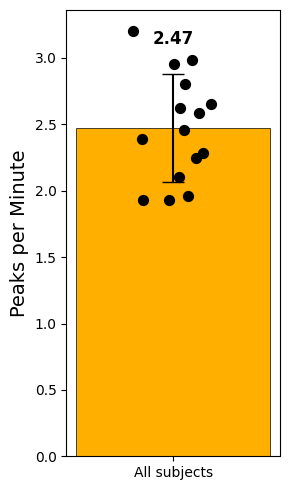

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- assume you already have rate_df
mean_rate = rate_df['Peaks_per_min'].mean()
std_rate  = rate_df['Peaks_per_min'].std(ddof=1)

fig, ax = plt.subplots(figsize=(3, 5))

# 1) draw bar with error bar
bar_x = 0
bar_width = 0.25
ax.bar(bar_x, mean_rate,
       yerr=std_rate,
       capsize=8,
       width=bar_width,
       color='#FFAF00',
       edgecolor='black',
       linewidth=0.5)

# 2) add mean value as text above the bar
ax.text(bar_x, mean_rate + std_rate + 0.2, f"{mean_rate:.2f}",
        ha='center', va='bottom', fontsize=12, fontweight='bold')

# 3) overlay individual subject dots (with slight jitter)
x_jitter = np.random.normal(bar_x, 0.03, size=len(rate_df))
ax.scatter(x_jitter, rate_df['Peaks_per_min'],
           color='black', s=50, zorder=5)

# 4) cosmetics
ax.set_xticks([bar_x])
ax.set_xticklabels(['All subjects'])
ax.set_ylabel('Peaks per Minute', fontsize=14)
# ax.set_title('Spontaneous Event Rate', fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1) Build a little table of recording durations per subject
#    (each trial’s duration minus the first 30 s)
dur_rows = []
for trial_name, trial in experiment.trials.items():
    subj = trial.subject_name
    dur_s = trial.timestamps[-1] - 30.0
    dur_rows.append({'Subject': subj, 'Duration_s': dur_s})
dur_df = pd.DataFrame(dur_rows)

# 2) Sum durations across trials for each subject, convert to minutes
time_per_subj = (
    dur_df
    .groupby('Subject', as_index=False)['Duration_s']
    .sum()
    .assign(Duration_min=lambda df: df['Duration_s'] / 60)
)

# 3) Count investigation bouts per subject (only those after 30 s)
beh_rows = []
for trial_name, trial in experiment.trials.items():
    subj = trial.subject_name
    # filter only Investigation events in the manual annotations
    if trial.behaviors is not None and not trial.behaviors.empty:
        inv = trial.behaviors[
            (trial.behaviors['Behavior'] == 'Investigation') &
            (trial.behaviors['Event_Start'] >= 30)
        ]
        n_inv = len(inv)
    else:
        n_inv = 0
    beh_rows.append({'Subject': subj, 'Num_Behaviors': n_inv})
behav_df = pd.DataFrame(beh_rows)

# 4) Merge & compute behaviors per minute
behavior_df = pd.merge(behav_df, time_per_subj, on='Subject')
behavior_df['Behaviors_per_min'] = behavior_df['Num_Behaviors'] / behavior_df['Duration_min']

print(behavior_df)


   Subject  Num_Behaviors   Duration_s  Duration_min  Behaviors_per_min
0       p1             58  1507.570867     25.126181           2.308349
1       p2             60  1516.001418     25.266690           2.374668
2       p3             53  1498.637000     24.977283           2.121928
3       p5             40  1286.363279     21.439388           1.865725
4       p6             27  1282.462576     21.374376           1.263195
5       p7             44  1285.104987     21.418416           2.054307
6       p8             34  1275.038658     21.250644           1.599951
7      pp1             58  1310.270811     21.837847           2.655939
8      pp2             31  1305.111817     21.751864           1.425165
9      pp3             41  1275.667804     21.261130           1.928402
10     pp4             44  1293.283880     21.554731           2.041315
11     pp5             40  1285.482475     21.424708           1.867003
12     pp6             25  1327.761058     22.129351           1